In [9]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=16
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [22]:


import networkx as nx
from cdt.causality.graph import SAM
from cdt.data import load_dataset
from cdt.independence.graph import LinearSVRL2
name="obstacle_cost"
json_file_path = 'npy_files/recording_10-11_49_obstacle_cost.json'
data = pd.read_json(json_file_path)
data = pd.DataFrame(data)
data = data.sample(n=100000, random_state=42)
print(data.shape)



(100000, 11)


In [19]:
obj = SAM(train_epochs=10,test_epochs=1,batch_size=1000)
#The predict() method works without a graph, or with a
#directed or undirected graph provided as an input
ograph = obj.predict(data)    #No graph provided as an argument
import torch  
import joblib   

import pickle
mode_path='model_B'+name+'.pkl'
# 保存模型
with open(mode_path, 'wb') as file:
    pickle.dump(obj, file)


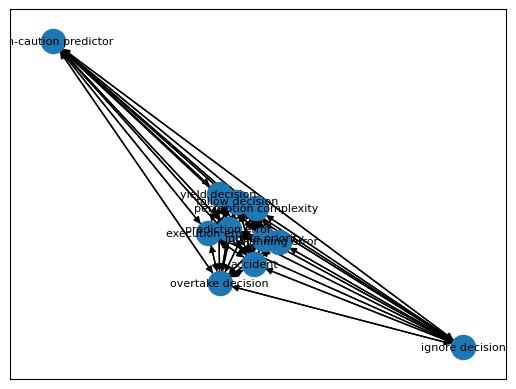

                     Cause                 Effect      Score
0    perception complexity        ignore priority  33.698185
1    perception complexity  non-caution predictor  30.576178
2    perception complexity       prediction error  71.285797
3    perception complexity        ignore decision  27.410677
4    perception complexity        follow decision  35.927334
..                     ...                    ...        ...
105               accident        follow decision  42.713829
106               accident         yield decision  34.239719
107               accident      overtake decision  33.439816
108               accident         planning error  44.295155
109               accident        execution error  26.934242

[110 rows x 3 columns]


In [21]:
# 加载模型
# with open("model1.pkl", 'rb') as file:
#     loaded_obj = pickle.load(file)
# with open('model_B'+name+'.pkl', 'rb') as file:
#     loaded_obj = pickle.load(file)
#To view the graph created, run the below commands:

nx.draw_networkx(ograph, font_size=8)

plt.show()
df = pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])
print(df)
df.to_csv('E:\homework\desktop\hw\CS280-作业\project\\results_SAM\\'+'SAM_'+name+'.csv')

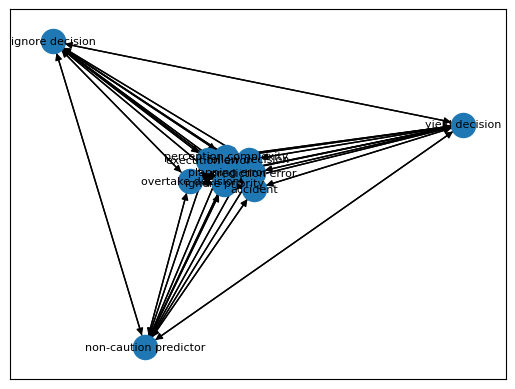

                     Cause                 Effect      Score
0    perception complexity        ignore priority  49.033852
1    perception complexity  non-caution predictor  44.562218
2    perception complexity       prediction error  86.700729
3    perception complexity        ignore decision  59.393986
4    perception complexity        follow decision  32.327141
..                     ...                    ...        ...
105               accident        follow decision  33.426132
106               accident         yield decision  18.841122
107               accident      overtake decision  31.755810
108               accident         planning error  33.466900
109               accident        execution error  26.451796

[110 rows x 3 columns]


In [14]:
# 加载模型
# with open("model1.pkl", 'rb') as file:
#     loaded_obj = pickle.load(file)
# with open('model_B'+name+'.pkl', 'rb') as file:
#     loaded_obj = pickle.load(file)
#To view the graph created, run the below commands:

nx.draw_networkx(ograph, font_size=8)

plt.show()
df = pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])
print(df)
df.to_csv('E:\homework\desktop\hw\CS280-作业\project\\results_SAM\\'+'SAM_'+name+'.csv')